In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('movies.csv')
df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
df.shape

(9742, 3)

In [9]:
df1 = pd.read_csv('ratings.csv')
df1

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
df1.shape

(100836, 4)

In [10]:
un = df1['userId'].unique()

In [11]:
print(len(un))

610


In [12]:
df1['rating'].max()

5.0

In [20]:
mrc = df1.groupby('movieId').size().reset_index(name = 'count')
maxrating = mrc['count'].idxmax()
maxratedmovie = mrc.loc[maxrating]

title122 = df.loc[df['movieId'] == maxratedmovie['movieId'],'title' ].values[0]
print(title122)
print(maxratedmovie['count'])

Forrest Gump (1994)
329


In [18]:
df3 = pd.read_csv('tags.csv')
df3

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [19]:
mid = df.loc[df['title'] == 'Matrix, The (1999)','movieId'].values[0]
matrixtags = df3.loc[df3['movieId'] == mid,'tag']
tags = matrixtags.unique()
print(tags)

['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [21]:
# Find the movieId for "Terminator 2: Judgment Day (1991)"
terminator_movie_id = df.loc[
    (df['title'] == 'Terminator 2: Judgment Day (1991)'), 'movieId'].values[0]

# Filter ratings for the specific movieId
terminator_ratings = df1.loc[df1['movieId'] == terminator_movie_id, 'rating']

# Calculate the average user rating
average_rating = terminator_ratings.mean()

print("Average user rating for Terminator 2: Judgment Day (1991):", average_rating)


Average user rating for Terminator 2: Judgment Day (1991): 3.970982142857143


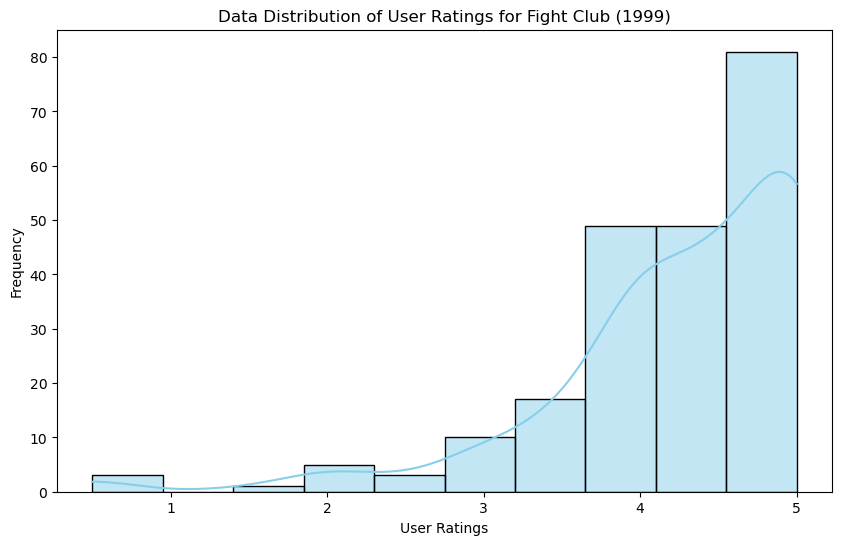

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find the movieId for "Fight Club (1999)"
fight_club_movie_id = df.loc[
    (df['title'] == 'Fight Club (1999)'), 'movieId'].values[0]

# Filter ratings for the specific movieId
fight_club_ratings = df1.loc[df1['movieId'] == fight_club_movie_id, 'rating']

# Plot the data distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(fight_club_ratings, bins=10, kde=True, color='skyblue')
plt.title('Data Distribution of User Ratings for Fight Club (1999)')
plt.xlabel('User Ratings')
plt.ylabel('Frequency')
plt.show()


In [29]:
# Group by 'movieId' and apply aggregation operations
ratings_grouped = df1.groupby('movieId').agg({'rating': ['count', 'mean']})

# Rename the columns for clarity
ratings_grouped.columns = ['rating_count', 'average_rating']

# Display the grouped and aggregated DataFrame
print(ratings_grouped.head())


         rating_count  average_rating
movieId                              
1                 215        3.920930
2                 110        3.431818
3                  52        3.259615
4                   7        2.357143
5                  49        3.071429


In [26]:
overall_mean_rating = df1['rating'].mean()
print(overall_mean_rating)

3.501556983616962


In [30]:
merged_df = pd.merge(df, ratings_grouped, on='movieId', how='inner')

# Display the merged DataFrame
print(merged_df.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  rating_count  average_rating  
0  Adventure|Animation|Children|Comedy|Fantasy           215        3.920930  
1                   Adventure|Children|Fantasy           110        3.431818  
2                               Comedy|Romance            52        3.259615  
3                         Comedy|Drama|Romance             7        2.357143  
4                                       Comedy            49        3.071429  


In [31]:
merged_df = pd.merge(df, ratings_grouped, on='movieId', how='inner')

# Filter only movies with more than 50 user ratings
filtered_movies = merged_df[merged_df['rating_count'] > 50]

# Display the filtered DataFrame
print(filtered_movies.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  average_rating  
0  Adventure|Animation|Children|Comedy|Fantasy           215        3.920930  
1                   Adventure|Children|Fantasy           110        3.431818  
2                               Comedy|Romance            52        3.259615  
5                        Action|Crime|Thriller           102        3.946078  
6                               Comedy|Romance            54        3.185185  


In [32]:
# Perform an inner join on 'movieId'
merged_df = pd.merge(df, ratings_grouped, on='movieId', how='inner')

# Filter only movies with more than 50 user ratings
filtered_movies = merged_df[merged_df['rating_count'] > 50]

# Sort the DataFrame by 'average_rating' in descending order
sorted_movies = filtered_movies.sort_values(by='average_rating', ascending=False)

# Display the top-rated movie
top_rated_movie = sorted_movies.iloc[0]
print("Most Popular Movie based on Average User Ratings:")
print(top_rated_movie[['title', 'average_rating']])


Most Popular Movie based on Average User Ratings:
title             Shawshank Redemption, The (1994)
average_rating                            4.429022
Name: 277, dtype: object


In [33]:
# Sort the DataFrame by 'rating_count' in descending order
sorted_movies = merged_df.sort_values(by='rating_count', ascending=False)

# Select the top 5 movies
top_5_movies = sorted_movies.head(5)

# Display the top 5 movies
print("Top 5 Popular Movies based on Number of User Ratings:")
print(top_5_movies[['title', 'rating_count']])


Top 5 Popular Movies based on Number of User Ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [34]:
# Filter only Sci-Fi movies
sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')]

# Sort Sci-Fi movies by 'rating_count' in descending order
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)

# Select the third most popular Sci-Fi movie
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]

# Display the third most popular Sci-Fi movie
print("Third Most Popular Sci-Fi Movie based on Number of User Ratings:")
print(third_most_popular_sci_fi_movie[['title', 'rating_count']])

Third Most Popular Sci-Fi Movie based on Number of User Ratings:
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [35]:
import requests
from bs4 import BeautifulSoup

# Read 'links.csv' into a DataFrame
links_df = pd.read_csv('links.csv')

# Assuming 'imdbId' is the column with IMDb IDs
imdb_ids = links_df['imdbId']

# Iterate through IMDb IDs and scrape reviews
for imdb_id in imdb_ids:
    # Construct the URL for the movie's IMDb page
    url = f'https://www.imdb.com/title/tt{imdb_id}/reviews'
    
    # Send a GET request to the IMDb page
    response = requests.get(url)
    
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content using BeautifulSoup or any other parser
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find and extract the reviews section from the HTML
        reviews = soup.find_all('div', class_='text show-more__control')
        
        # Process or save the reviews as needed
        for review in reviews:
            print(review.text)  # Example: Print the reviews
    else:
        print(f"Failed to fetch reviews for IMDb ID: {imdb_id}")


Failed to fetch reviews for IMDb ID: 114709
Failed to fetch reviews for IMDb ID: 113497
Failed to fetch reviews for IMDb ID: 113228
Failed to fetch reviews for IMDb ID: 114885
Failed to fetch reviews for IMDb ID: 113041
Failed to fetch reviews for IMDb ID: 113277
Failed to fetch reviews for IMDb ID: 114319
Failed to fetch reviews for IMDb ID: 112302
Failed to fetch reviews for IMDb ID: 114576
Failed to fetch reviews for IMDb ID: 113189
Failed to fetch reviews for IMDb ID: 112346
Failed to fetch reviews for IMDb ID: 112896
Failed to fetch reviews for IMDb ID: 112453
Failed to fetch reviews for IMDb ID: 113987
Failed to fetch reviews for IMDb ID: 112760
Failed to fetch reviews for IMDb ID: 112641
Failed to fetch reviews for IMDb ID: 114388
Failed to fetch reviews for IMDb ID: 113101
Failed to fetch reviews for IMDb ID: 112281
Failed to fetch reviews for IMDb ID: 113845
Failed to fetch reviews for IMDb ID: 113161
Failed to fetch reviews for IMDb ID: 112722
Failed to fetch reviews for IMDb

Failed to fetch reviews for IMDb ID: 112757
Failed to fetch reviews for IMDb ID: 112643
Failed to fetch reviews for IMDb ID: 112679
Failed to fetch reviews for IMDb ID: 109445
Failed to fetch reviews for IMDb ID: 112883
Failed to fetch reviews for IMDb ID: 109635
Failed to fetch reviews for IMDb ID: 109676
Failed to fetch reviews for IMDb ID: 112854
Failed to fetch reviews for IMDb ID: 109579
Failed to fetch reviews for IMDb ID: 109642
Failed to fetch reviews for IMDb ID: 109686
Failed to fetch reviews for IMDb ID: 111797
Failed to fetch reviews for IMDb ID: 109759
Failed to fetch reviews for IMDb ID: 109758


KeyboardInterrupt: 

In [36]:
links_df

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [38]:
# Find the movie with the highest IMDb rating
highest_rated_movie = links_df.loc[links_df['imdbId'].idxmax()]

# Retrieve the movieId associated with the highest rated movie
highest_rated_movie_id = highest_rated_movie['movieId']

# Display the result
print("MovieId of the movie with the highest IMDb rating:", highest_rated_movie_id)


MovieId of the movie with the highest IMDb rating: 193587.0


In [44]:
# Merge IMDb ratings and movies DataFrames on 'movieId'
merged_df = pd.merge(df3,df1, on='movieId', how = 'inner')

# Filter movies with the "Sci-Fi" genre
sci_fi_movies = merged_df[merged_df['tag'].str.contains('Sci-Fi')]

# Find the Sci-Fi movie with the highest IMDb rating
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['rating'].idxmax()]

# Retrieve the movieId associated with the highest rated Sci-Fi movie
highest_rated_sci_fi_movie_id = highest_rated_sci_fi_movie['movieId']

# Display the result
print("MovieId of the highest rated Sci-Fi movie:", highest_rated_sci_fi_movie_id)


MovieId of the highest rated Sci-Fi movie: 1240
